# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Import Data

In [2]:
impt_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
impt_data

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Bank,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No


In [4]:
impt_data.isnull().any()

ID                     False
sex                    False
Aged                   False
Married                False
TotalDependents        False
ServiceSpan            False
MobileService          False
4GService              False
CyberProtection        False
HardwareSupport        False
TechnicalAssistance    False
FilmSubscription       False
SettlementProcess      False
QuarterlyPayment       False
GrandPayment            True
CustomerAttrition      False
dtype: bool

In [5]:
impt_data[impt_data['GrandPayment'].isnull().values]

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
643,WM9BC6CU0ZI1B7WDPZ6G,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN,No
1169,41E4MSKS139ATWAHUWS5,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN,No
1186,LZMNTZPKWEM8IAOSPSTQ,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No
2281,N3OCBW4F5ADT1GNDI1K8,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,NaN,No
3611,IS6FHA32W1KEETF478HC,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,NaN,No
3918,S661RZU0I205HLT4G6DD,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,NaN,No
5579,Z5G1GX5IS15OMT9HRYJU,Male,No,Yes,Yes,0,Yes,Wifi Broadband,Yes,Yes,Yes,No,Bank,51.669205,NaN,No
5742,QEQYQ949C4H8J47LT3W4,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,NaN,No
5796,P7UZJPSJDE0QKU1L3MIP,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,NaN,No
6203,SGAKX7STDIYEMP82AMFY,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,NaN,No


In [6]:
impt_data['GrandPayment'].fillna(value = impt_data['QuarterlyPayment'], inplace = True)

In [7]:
expt = impt_data[impt_data["ServiceSpan"] <= 0]

In [8]:
expt["QuarterlyPayment"]

7       70.062808
26      17.970238
40      21.985193
51      49.402192
53      25.009332
          ...    
6276    20.660044
6307    44.385808
6322    93.604209
6323    91.135867
6334    44.782165
Name: QuarterlyPayment, Length: 343, dtype: float64

In [9]:
expt["GrandPayment"]

7       70.934345
26      20.984040
40      19.350136
51      49.384029
53      24.269131
          ...    
6276    19.163217
6307    42.768224
6322    91.084541
6323    90.630675
6334    45.308180
Name: GrandPayment, Length: 343, dtype: float64

In [10]:
impt_data["ServiceSpan"].replace([0, -1, -2], 1, inplace = True)

In [11]:
(impt_data["ServiceSpan"] * impt_data["QuarterlyPayment"])

0       4620.470495
1        849.441157
2       6254.947369
3       1121.523740
4       1288.244334
           ...     
6333     301.174786
6334      44.782165
6335     646.950841
6336    4359.097277
6337    5660.240592
Length: 6338, dtype: float64

In [12]:
impt_data["GrandPayment"]

0       4628.129119
1        922.085998
2       6205.891129
3       1248.655391
4       1285.321277
           ...     
6333     441.914530
6334      45.308180
6335     552.181341
6336    4563.812326
6337    5756.542013
Name: GrandPayment, Length: 6338, dtype: float64

In [13]:
(impt_data["ServiceSpan"] * impt_data["QuarterlyPayment"]) - impt_data["GrandPayment"]

0        -7.658624
1       -72.644841
2        49.056240
3      -127.131651
4         2.923057
           ...    
6333   -140.739743
6334     -0.526015
6335     94.769500
6336   -204.715049
6337    -96.301421
Length: 6338, dtype: float64

In [14]:
def_data = impt_data[impt_data["CustomerAttrition"] == "No"]
good_data = impt_data[impt_data["CustomerAttrition"] == "Yes"]

# Exp Data Analysis

In [15]:
impt_data.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6338.000000
mean,32.021773,64.814490,2286.992176
std,24.461475,30.191091,2265.156617
min,1.000000,16.504109,16.297961
25%,8.000000,35.645524,398.700441
50%,29.000000,70.534085,1402.041551
75%,55.000000,90.058498,3810.390937
max,73.000000,120.159190,8685.848657


In [16]:
impt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6338 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [17]:
def percentage_hue(attribute):
    fig, ax = plt.subplots(figsize=(20, 6))

    attribute_counts = (impt_data.groupby([attribute])['CustomerAttrition']
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values('percentage'))
    p = sns.barplot(x=attribute, y="percentage", hue="CustomerAttrition", data=attribute_counts)
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

In [18]:
def density_plot(attribute):
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))

    sns.kdeplot(data=good_data, x=attribute, ax=ax[0], shade=True, hue_order=[1, 0], alpha=1)
    sns.kdeplot(data=def_data,  x=attribute, ax=ax[1], shade=True, hue_order=[1, 0], alpha=1)
    
    ax[0].set_title("Yes")
    ax[1].set_title("No")
    
    plt.show()

In [19]:
#visualisation data on boxplot to see the outliers
def box_plot(column):
    impt_data.boxplot(by="CustomerAttrition",column=[column],grid=True)

In [20]:
impt_data.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment', 'CustomerAttrition'],
      dtype='object')

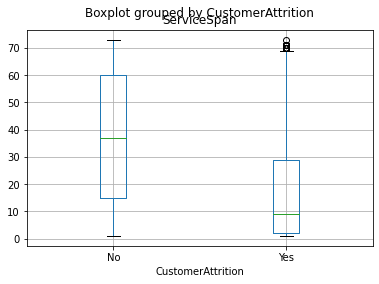

In [21]:
box_plot("ServiceSpan")

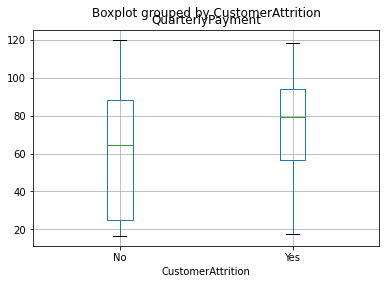

In [22]:
box_plot("QuarterlyPayment")

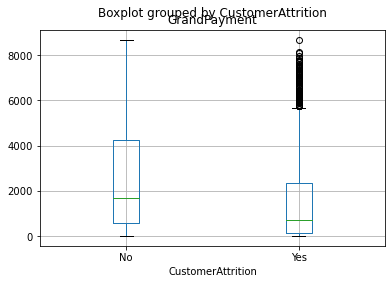

In [23]:
box_plot("GrandPayment")

In [24]:
Q1 = np.percentile(good_data["ServiceSpan"], 25, interpolation = 'midpoint')
Q2 = np.percentile(good_data["ServiceSpan"], 50, interpolation = 'midpoint')
Q3 = np.percentile(good_data["ServiceSpan"], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  2.0
Q1 50 percentile of the given data is,  9.0
Q1 75 percentile of the given data is,  29.0
Interquartile range is 27.0


In [25]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -38.5
up_limit is 69.5


In [26]:
outlier =[]
for x in good_data["ServiceSpan"]:
    if ((x> up_lim) or (x<low_lim)):
        outlier.append(x)
print(' outlier in the dataset is', outlier)


 outlier in the dataset is [70, 70, 70, 70, 71, 71, 71, 73, 70, 71, 70, 71, 71, 70, 70, 70, 71]


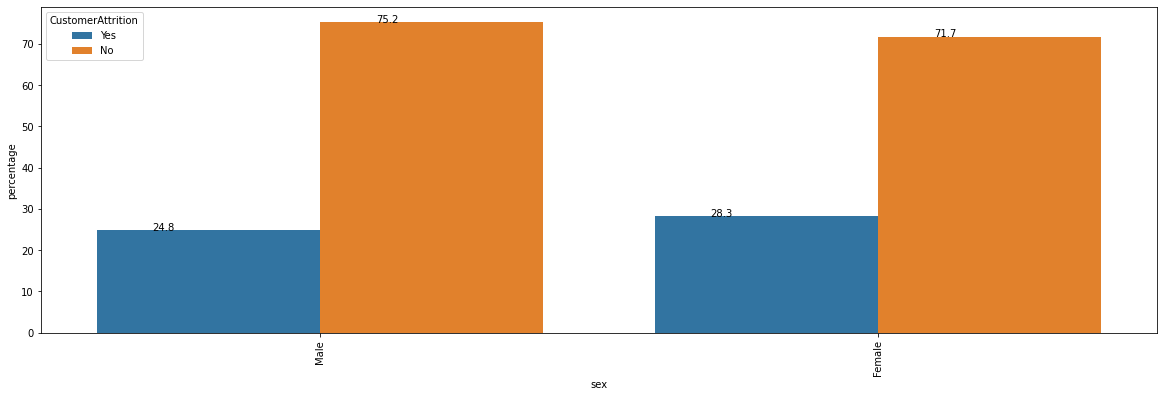

In [27]:
percentage_hue("sex")

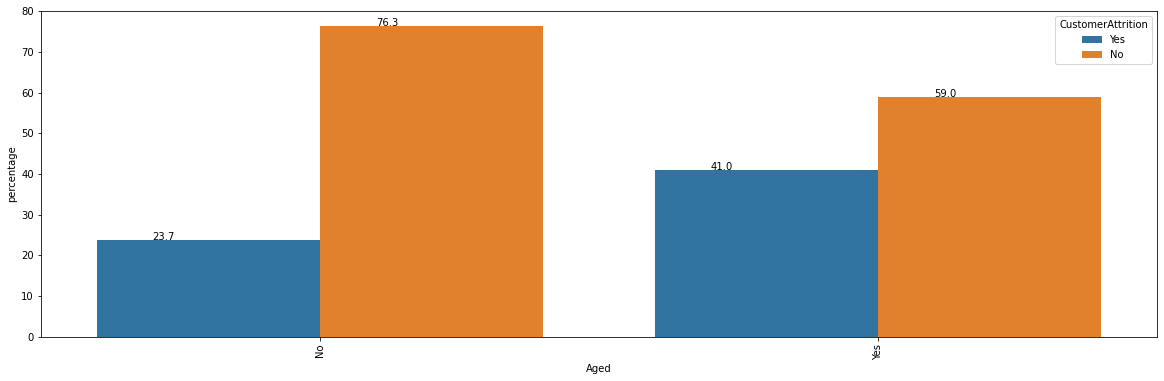

In [28]:
percentage_hue("Aged")

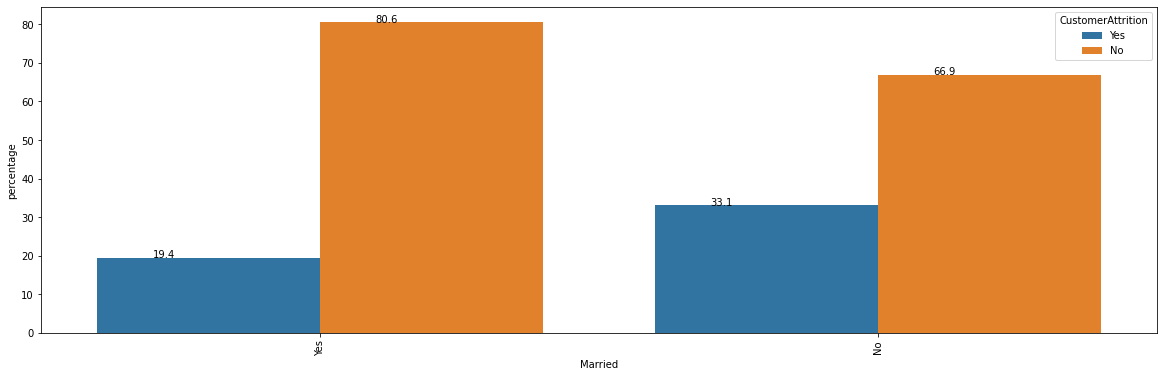

In [29]:
percentage_hue("Married")

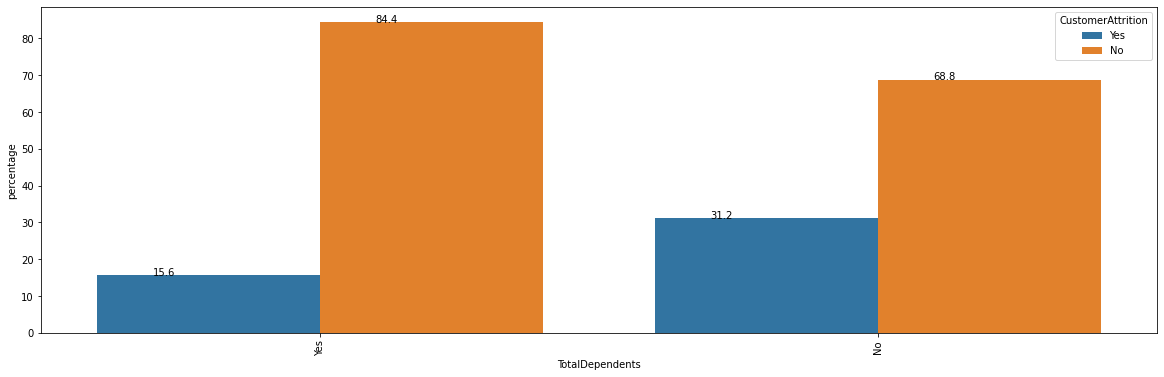

In [30]:
percentage_hue("TotalDependents")

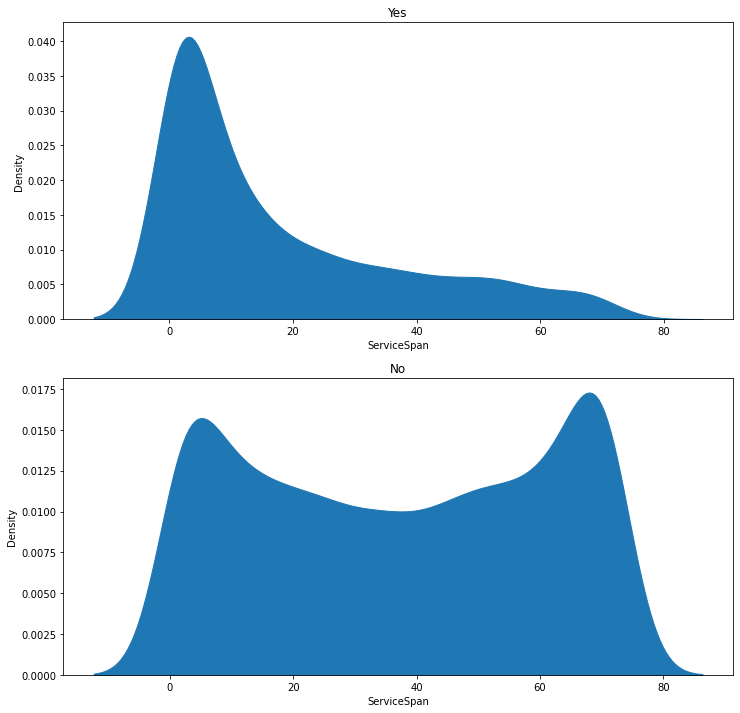

In [31]:
density_plot("ServiceSpan")

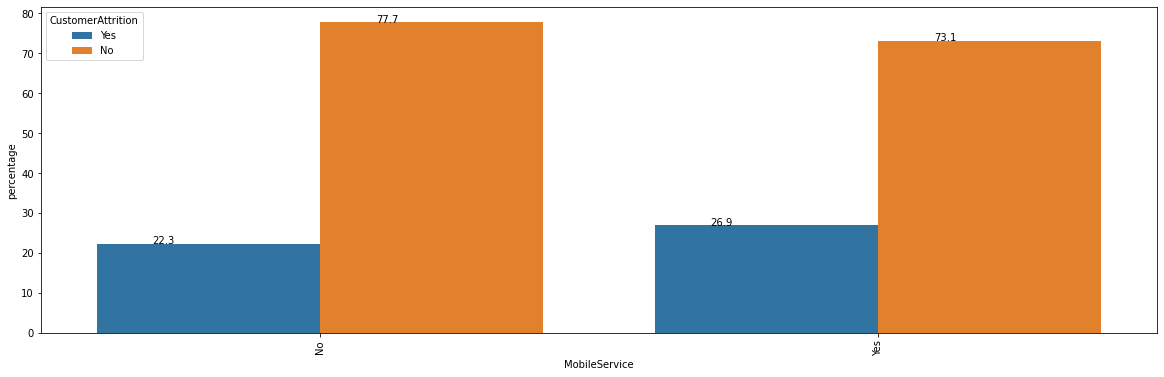

In [32]:
percentage_hue("MobileService")

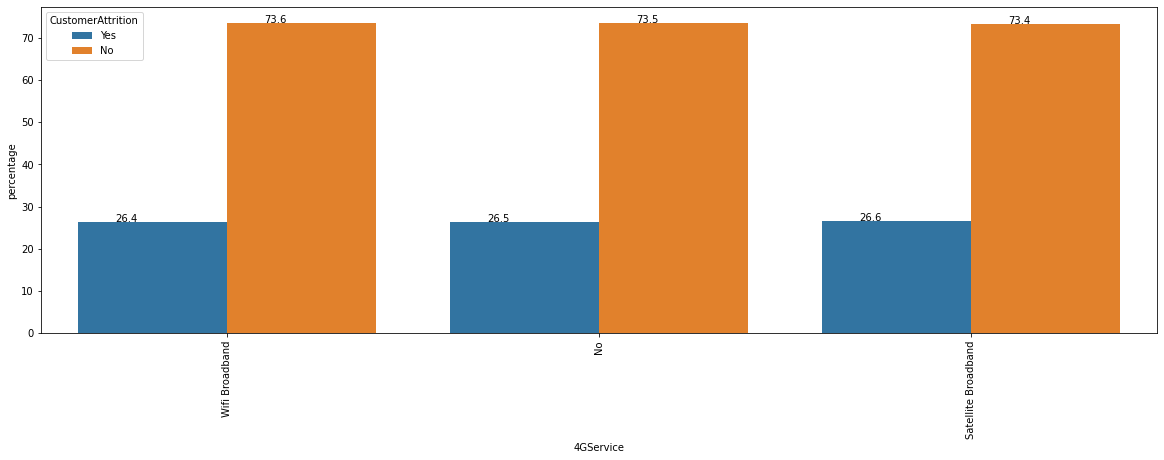

In [33]:
percentage_hue("4GService")

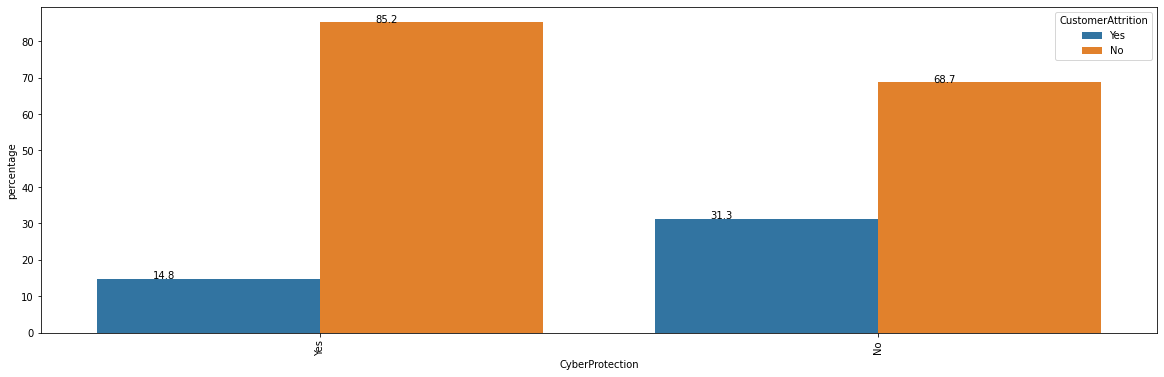

In [34]:
percentage_hue("CyberProtection")

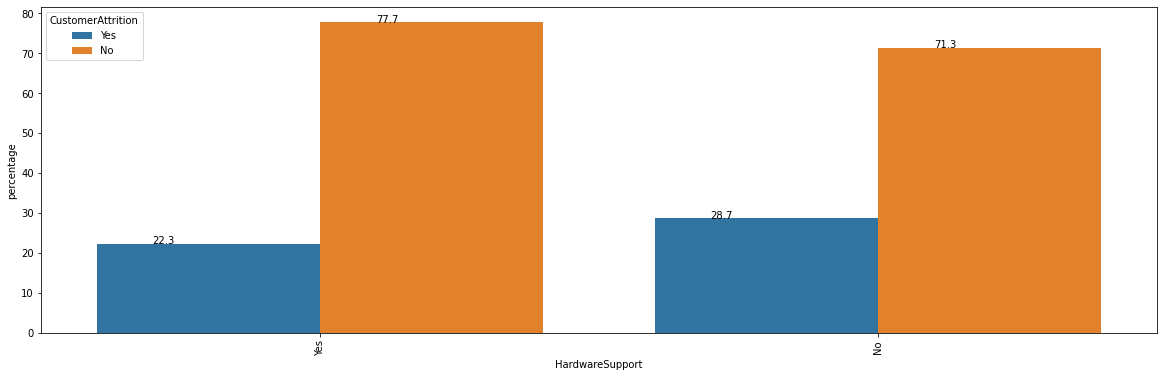

In [35]:
percentage_hue("HardwareSupport")

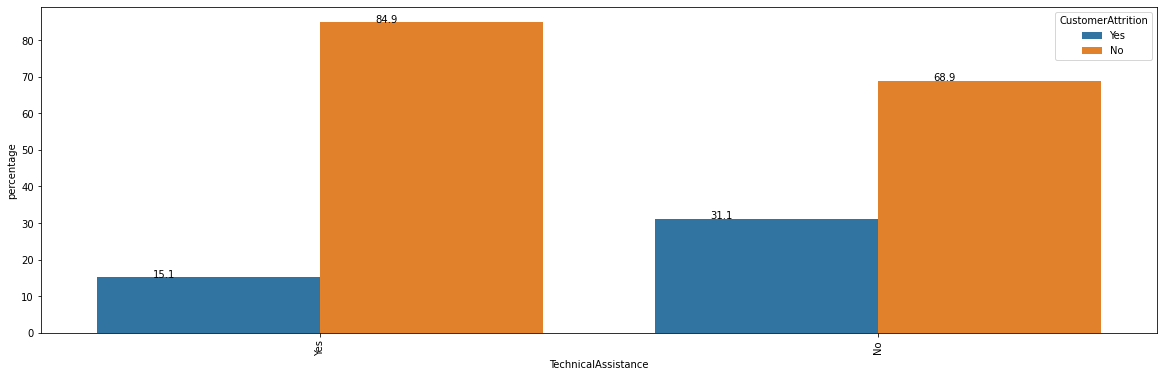

In [36]:
percentage_hue("TechnicalAssistance")

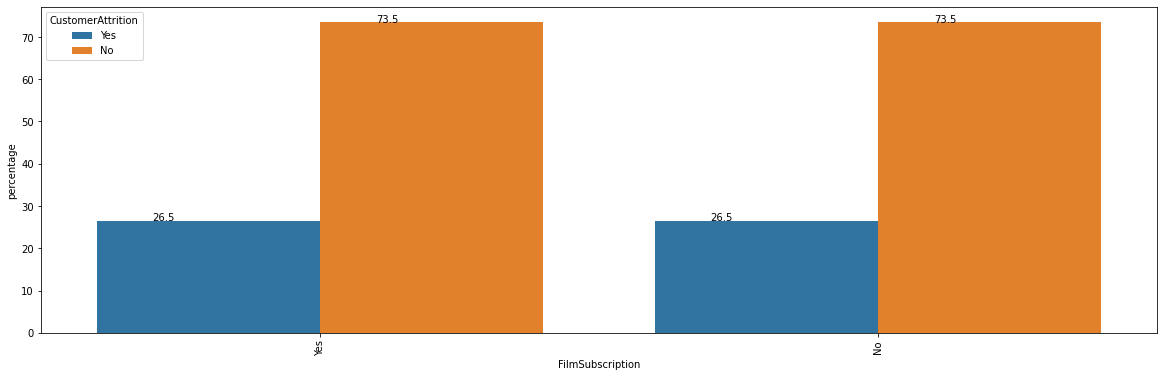

In [37]:
percentage_hue("FilmSubscription")

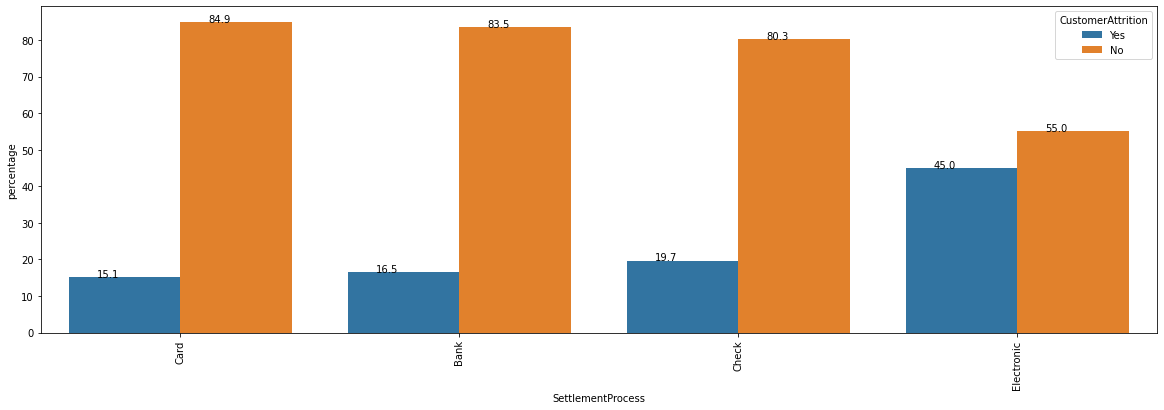

In [38]:
percentage_hue("SettlementProcess")

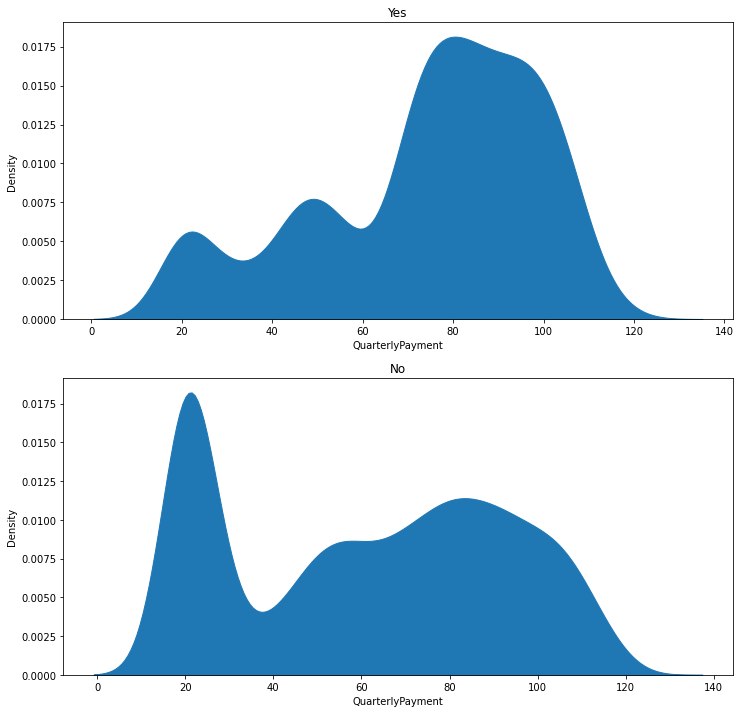

In [39]:
density_plot("QuarterlyPayment")

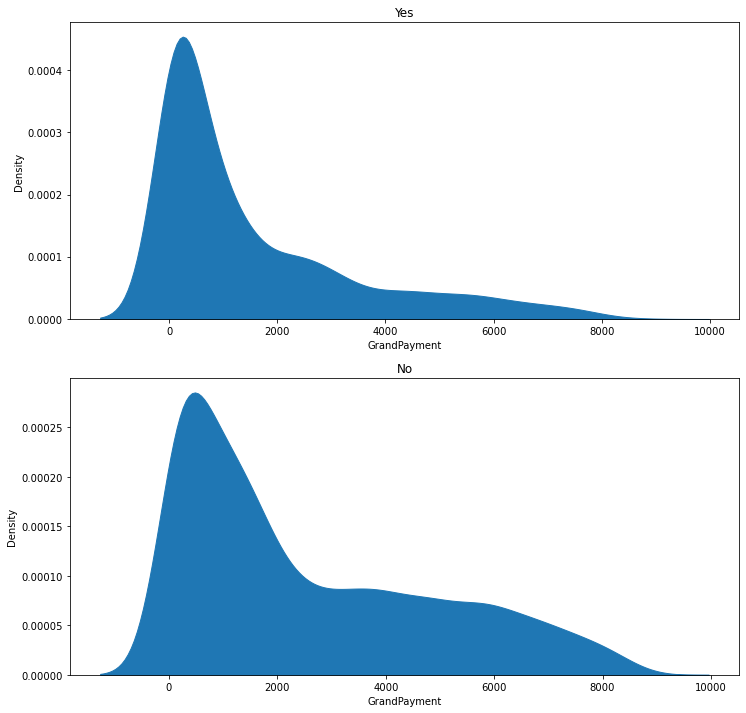

In [40]:
density_plot("GrandPayment")

<AxesSubplot:>

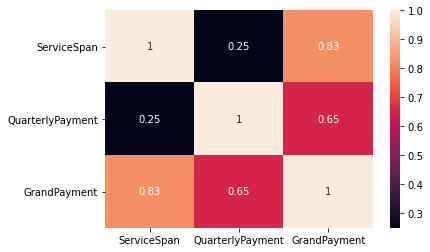

In [41]:
sns.heatmap(impt_data.corr(), annot=True)

In [42]:
outliers = impt_data.loc[(impt_data["ServiceSpan"] > 69.5) & (impt_data["CustomerAttrition"] == "Yes")]

In [43]:
impt_data.drop(outliers.index, axis = 0, inplace = True)

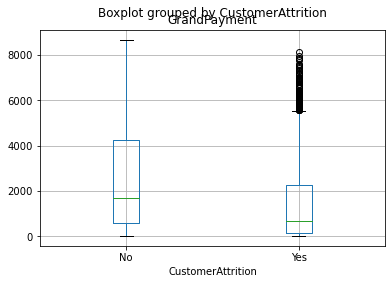

In [44]:
box_plot("GrandPayment")

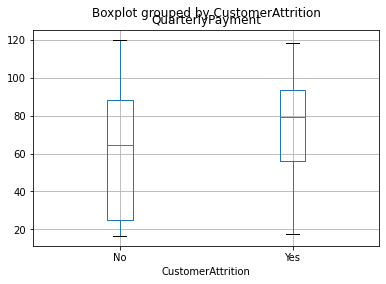

In [45]:
box_plot("QuarterlyPayment")

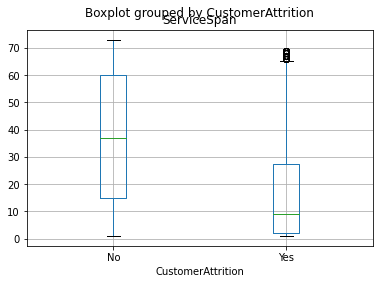

In [46]:
box_plot("ServiceSpan")

In [47]:
impt_data["CustomerAttrition"].value_counts()

No     4658
Yes    1663
Name: CustomerAttrition, dtype: int64

In [48]:
# include_columns = ['sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
#        'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
#        'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
#        'QuarterlyPayment', 'GrandPayment']
include_columns = ['Aged', 'Married', 'TotalDependents', 'ServiceSpan', 'CyberProtection', 'HardwareSupport',
                   'TechnicalAssistance','GrandPayment',
                   'QuarterlyPayment']

data_pd = impt_data[include_columns]
data_test_pd = test_data[include_columns]

 # Encoding

In [49]:
def OH_enc(attribute):
    global data_pd, data_test_pd
    
    attribute_series = data_pd.pop(attribute)
    attribute_test_series = data_test_pd.pop(attribute)

    y = pd.get_dummies(attribute_series)
    data_pd = pd.concat([data_pd, y], axis=1, join="inner")

    y = pd.get_dummies(attribute_test_series)
    data_test_pd = pd.concat([data_test_pd, y], axis=1, join="inner")

In [50]:
def lab_enc(attribute):
    global data_pd, data_test_pd
    
    le = LabelEncoder()
    att = pd.concat([data_pd[attribute], data_test_pd[attribute]], axis=0)
    le.fit(att)

    data_pd[attribute] = le.transform(data_pd[attribute])
    data_test_pd[attribute] = le.transform(data_test_pd[attribute])

# Pre Processing

In [51]:
bc_labels_pd = impt_data["CustomerAttrition"]

In [52]:
impt_data.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment', 'CustomerAttrition'],
      dtype='object')

In [53]:
# Categorical boolean mask
categorical_feature_mask = data_pd.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_pd.columns[categorical_feature_mask].tolist()

In [54]:
for col in categorical_cols:
    lab_enc(col)
#     OH_enc(col)

<ipython-input-50-f7e820f4de5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pd[attribute] = le.transform(data_pd[attribute])
<ipython-input-50-f7e820f4de5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_pd[attribute] = le.transform(data_test_pd[attribute])


In [55]:
data = data_pd.to_numpy()
X_test = data_test_pd.to_numpy()
data = preprocessing.scale(data)
X_test = preprocessing.scale(X_test)
labels = bc_labels_pd.to_numpy()
print(data_pd.shape)
print(X_test.shape)
print(labels.shape)

(6321, 9)
(705, 9)
(6321,)


<AxesSubplot:>

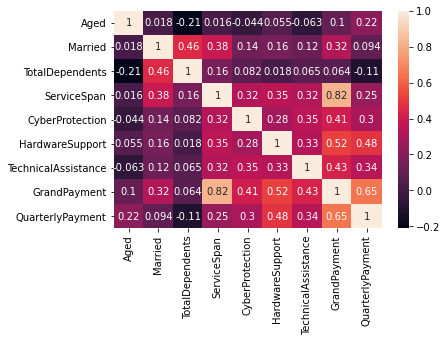

In [56]:
sns.heatmap(data_pd.corr(), annot=True)

# PCA

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components = 10)
data = StandardScaler().fit_transform(data)
# data = pca.fit_transform(data)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

# Accuracy Score

In [58]:
def transform(Y):
    labels = ["No", "Yes"]
    return([labels[x] for x in Y])

In [59]:
def accuracy_ml(Y_hat, Y):
    return(classification_report(Y_hat, Y))

In [60]:
def visualize(model):  
    print("Train: ", accuracy_ml(Y_train, model.predict(X_train)))
    cm = confusion_matrix(Y_train, model.predict(X_train))
    print(cm)
    plt.imshow(cm, cmap='binary')
    
    print("Val: ", accuracy_ml(Y_val, model.predict(X_val)))
    cm = confusion_matrix(Y_val, model.predict(X_val))
    print(cm)
    plt.imshow(cm, cmap='binary')
    
    print("Test: ", accuracy_ml(Y_Test, model.predict(X_Test)))
    cm = confusion_matrix(Y_Test, model.predict(X_Test))
    print(cm)
    plt.imshow(cm, cmap='binary')

In [61]:
def visualize_proba(model, proba):  
    Y_pred =  np.where(model.predict_proba(X_train)[:,1] >= proba, 1, 0 )
    print("Train: ", accuracy_ml(Y_train, transform(Y_pred)))
    cm = confusion_matrix(Y_train, transform(Y_pred))
    print(cm)
    plt.imshow(cm, cmap='binary')
    
    Y_pred =  np.where(model.predict_proba(X_val)[:,1] >= proba, 1, 0 )
    print("Val: ", accuracy_ml(Y_val, transform(Y_pred)))
    cm = confusion_matrix(Y_val, transform(Y_pred))
    print(cm)
    plt.imshow(cm, cmap='binary')
    
    Y_pred =  np.where(model.predict_proba(X_Test)[:,1] >= proba, 1, 0 )
    print("Test: ", accuracy_ml(Y_Test, transform(Y_pred)))
    cm = confusion_matrix(Y_Test, transform(Y_pred))
    print(cm)
    plt.imshow(cm, cmap='binary')

# Train Test Split

In [62]:
data.shape

(6321, 9)

In [63]:
X_temp, X_Test, Y_temp, Y_Test = train_test_split(data, labels, random_state = 10, test_size = 0.2, shuffle=True, stratify=labels)

In [64]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy = 0.7)
under = RandomUnderSampler(sampling_strategy = 0.8)

steps = [('o', over), ('u', under)]
# steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_temp, Y_temp = pipeline.fit_resample(X_temp, Y_temp)

In [65]:
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, random_state = 100, test_size = 0.2, shuffle=True, stratify=Y_temp)

In [66]:
X_train.shape

(4694, 9)

In [67]:
np.count_nonzero(Y_train == "No")

2608

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [87]:
rfc.predict_proba(X_Test)

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.46, 0.54],
       ...,
       [0.28, 0.72],
       [0.35, 0.65],
       [0.96, 0.04]])

Train:                precision    recall  f1-score   support

          No       1.00      1.00      1.00      2608
         Yes       1.00      1.00      1.00      2086

    accuracy                           1.00      4694
   macro avg       1.00      1.00      1.00      4694
weighted avg       1.00      1.00      1.00      4694

[[2608    0]
 [   6 2080]]
Val:                precision    recall  f1-score   support

          No       0.77      0.88      0.82       652
         Yes       0.81      0.66      0.73       522

    accuracy                           0.78      1174
   macro avg       0.79      0.77      0.78      1174
weighted avg       0.79      0.78      0.78      1174

[[573  79]
 [175 347]]
Test:                precision    recall  f1-score   support

          No       0.82      0.86      0.84       932
         Yes       0.54      0.47      0.50       333

    accuracy                           0.76      1265
   macro avg       0.68      0.66      0.67      1265
wei

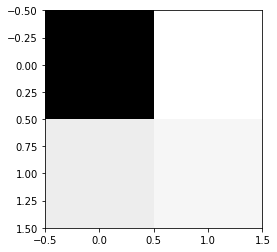

In [88]:
visualize_proba(rfc, 0.6)

In [70]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [71]:
# # Fit the grid search to the data
# grid_search.fit(X_train, Y_train)
# grid_search.best_params_

In [72]:
# best_grid = grid_search.best_estimator_
# grid_accuracy = visualize(best_grid)

In [73]:
from sklearn.svm import SVC, LinearSVC, NuSVC

svc = SVC(kernel="linear", C=0.05, probability=True)
svc.fit(X_train, Y_train)

SVC(C=0.05, kernel='linear', probability=True)

Train:                precision    recall  f1-score   support

          No       0.75      0.79      0.77      2608
         Yes       0.72      0.68      0.70      2086

    accuracy                           0.74      4694
   macro avg       0.74      0.74      0.74      4694
weighted avg       0.74      0.74      0.74      4694

[[2069  539]
 [ 674 1412]]
Val:                precision    recall  f1-score   support

          No       0.76      0.83      0.79       652
         Yes       0.75      0.67      0.71       522

    accuracy                           0.75      1174
   macro avg       0.75      0.75      0.75      1174
weighted avg       0.75      0.75      0.75      1174

[[538 114]
 [174 348]]
Test:                precision    recall  f1-score   support

          No       0.86      0.81      0.83       932
         Yes       0.54      0.64      0.58       333

    accuracy                           0.76      1265
   macro avg       0.70      0.72      0.71      1265
wei

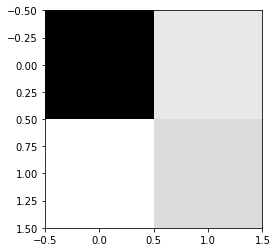

In [74]:
visualize(svc)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Train:                precision    recall  f1-score   support

          No       0.78      0.83      0.80      2608
         Yes       0.77      0.70      0.73      2086

    accuracy                           0.77      4694
   macro avg       0.77      0.76      0.77      4694
weighted avg       0.77      0.77      0.77      4694

[[2162  446]
 [ 625 1461]]
Val:                precision    recall  f1-score   support

          No       0.77      0.83      0.80       652
         Yes       0.77      0.69      0.73       522

    accuracy                           0.77      1174
   macro avg       0.77      0.76      0.76      1174
weighted avg       0.77      0.77      0.77      1174

[[543 109]
 [161 361]]
Test:                precision    recall  f1-score   support

          No       0.87      0.81      0.84       932
         Yes       0.55      0.65      0.60       333

    accuracy                           0.77      1265
   macro avg       0.71      0.73      0.72      1265
wei

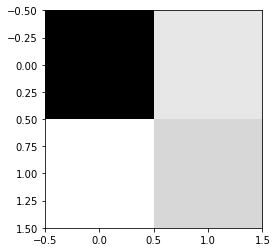

In [76]:
visualize_proba(gbc, 0.55)

In [77]:
from xgboost import XGBClassifier

# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

[20:42:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sriram/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Train:                precision    recall  f1-score   support

          No       0.95      0.94      0.95      2608
         Yes       0.92      0.94      0.93      2086

    accuracy                           0.94      4694
   macro avg       0.94      0.94      0.94      4694
weighted avg       0.94      0.94      0.94      4694

[[2448  160]
 [ 124 1962]]
Val:                precision    recall  f1-score   support

          No       0.80      0.82      0.81       652
         Yes       0.77      0.74      0.75       522

    accuracy                           0.78      1174
   macro avg       0.78      0.78      0.78      1174
weighted avg       0.78      0.78      0.78      1174

[[533 119]
 [134 388]]
Test:                precision    recall  f1-score   support

          No       0.85      0.78      0.81       932
         Yes       0.49      0.61      0.54       333

    accuracy                           0.73      1265
   macro avg       0.67      0.69      0.68      1265
wei

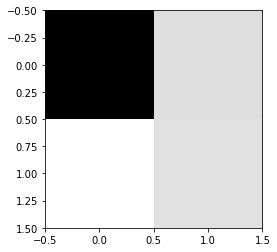

In [78]:
visualize(xgb)

In [79]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, Y_train)

BalancedRandomForestClassifier(random_state=0)

Train:                precision    recall  f1-score   support

          No       1.00      0.99      1.00      2608
         Yes       0.99      1.00      1.00      2086

    accuracy                           1.00      4694
   macro avg       1.00      1.00      1.00      4694
weighted avg       1.00      1.00      1.00      4694

[[2593   15]
 [   0 2086]]
Val:                precision    recall  f1-score   support

          No       0.83      0.77      0.80       652
         Yes       0.74      0.80      0.77       522

    accuracy                           0.79      1174
   macro avg       0.78      0.79      0.79      1174
weighted avg       0.79      0.79      0.79      1174

[[505 147]
 [104 418]]
Test:                precision    recall  f1-score   support

          No       0.86      0.74      0.80       932
         Yes       0.48      0.67      0.56       333

    accuracy                           0.72      1265
   macro avg       0.67      0.71      0.68      1265
wei

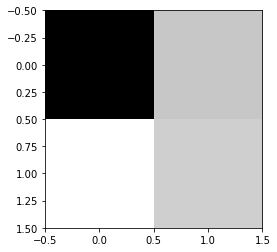

In [80]:
visualize(brf)

In [81]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (100, 500), random_state=1, max_iter=300)
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 500), max_iter=300, random_state=1)

Train:                precision    recall  f1-score   support

          No       0.85      0.83      0.84      2608
         Yes       0.79      0.82      0.81      2086

    accuracy                           0.83      4694
   macro avg       0.82      0.82      0.82      4694
weighted avg       0.83      0.83      0.83      4694

[[2165  443]
 [ 378 1708]]
Val:                precision    recall  f1-score   support

          No       0.78      0.80      0.79       652
         Yes       0.74      0.72      0.73       522

    accuracy                           0.77      1174
   macro avg       0.76      0.76      0.76      1174
weighted avg       0.77      0.77      0.77      1174

[[522 130]
 [144 378]]
Test:                precision    recall  f1-score   support

          No       0.85      0.78      0.81       932
         Yes       0.50      0.63      0.56       333

    accuracy                           0.74      1265
   macro avg       0.68      0.70      0.69      1265
wei

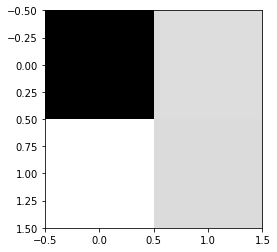

In [82]:
visualize_proba(mlp, 0.5)

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

estimators = [('rf', rf),
             ('svc', make_pipeline(StandardScaler(), svc)),
             ('gbc', gbc)]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf1.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('svc',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=0.05, kernel='linear',
                                                     probability=True))])),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=1,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [85]:
clf1.predict_proba(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Train:                precision    recall  f1-score   support

          No       0.90      1.00      0.95      2608
         Yes       1.00      0.86      0.93      2086

    accuracy                           0.94      4694
   macro avg       0.95      0.93      0.94      4694
weighted avg       0.95      0.94      0.94      4694

[[2608    0]
 [ 283 1803]]
Val:                precision    recall  f1-score   support

          No       0.73      0.91      0.81       652
         Yes       0.84      0.58      0.69       522

    accuracy                           0.77      1174
   macro avg       0.79      0.75      0.75      1174
weighted avg       0.78      0.77      0.76      1174

[[594  58]
 [217 305]]
Test:                precision    recall  f1-score   support

          No       0.81      0.91      0.86       932
         Yes       0.61      0.41      0.49       333

    accuracy                           0.77      1265
   macro avg       0.71      0.66      0.67      1265
wei

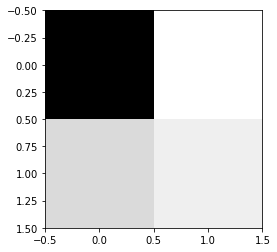

In [86]:
visualize_proba(clf1, 0.7)

In [89]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(30),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_Test)
    acc = accuracy_score(Y_Test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_Test)
    ll = log_loss(Y_Test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 74.2292%
Log Loss: 0.6111911891434335
SVC
****Results****
Accuracy: 77.9447%
Log Loss: 0.4976538521552238
NuSVC
****Results****
Accuracy: 73.9921%
Log Loss: 0.5170389313153526
DecisionTreeClassifier
****Results****
Accuracy: 69.0909%
Log Loss: 10.675621794790574
RandomForestClassifier
****Results****
Accuracy: 73.0435%
Log Loss: 0.649438852073519
AdaBoostClassifier
****Results****
Accuracy: 75.1779%
Log Loss: 0.6599569085635713
GradientBoostingClassifier
****Results****
Accuracy: 75.3360%
Log Loss: 0.4776587730257341
GaussianNB
****Results****
Accuracy: 69.7233%
Log Loss: 0.6964652723203644
LinearDiscriminantAnalysis
****Results****
Accuracy: 76.6008%
Log Loss: 0.4845635670293571
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 70.8300%
Log Loss: 0.7004235880360835


# Saving Model

In [ ]:
import csv
Y_test_pred = clf1.predict(X_test)

with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'CustomerAttrition'])
    for i, row in enumerate(Y_test_pred):
        writer.writerow([test_data["ID"][i], row])

file.close()